# k-Nearest Neighbors (k-NN) Algorithm <a href="https://colab.research.google.com/github/burakai/ENGR4450/blob/main/4_support-vector-machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k-Nearest Neighbors (k-NN) is a simple, intuitive, and widely-used algorithm for both classification and regression tasks in machine learning. It is a type of instance-based learning, where the algorithm learns from the training dataset and makes predictions based on the proximity of the input data to the training examples.

The k-NN algorithm operates on the following principles:

1. **Distance Metric**: k-NN relies on a distance metric (commonly Euclidean distance) to measure the similarity between data points. The distance between two points $ x $ and $ y $ in an n-dimensional space is calculated as:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$

2. **Choosing k**: The parameter $ k $ represents the number of nearest neighbors to consider when making a prediction. The choice of $ k $ can significantly influence the model's performance:
   - A small value of $ k $ (e.g., $ k = 1 $) can lead to overfitting, as the model may be too sensitive to noise in the training data.
   - A larger value of $ k $ tends to smooth out predictions but may overlook local patterns in the data.

3. **Prediction**:
   - **Classification**: For a classification task, the algorithm assigns the class label that is most common among the $ k $ nearest neighbors. This is often done using a majority vote.
   - **Regression**: For regression tasks, the prediction is typically the average of the values of the $ k $ nearest neighbors.

**Advantages**
- **Simplicity**: k-NN is easy to understand and implement.
- **No Training Phase**: The algorithm does not require a training phase; it simply stores the training instances and makes predictions on the fly.
- **Flexible**: It can be used for both classification and regression problems.

**Disadvantages**
- **Computationally Expensive**: k-NN can be slow, especially with large datasets, as it requires calculating the distance to every training instance for each prediction.
- **Curse of Dimensionality**: The performance of k-NN can degrade with high-dimensional data due to the sparsity of the data points.
- **Sensitive to Irrelevant Features**: The presence of irrelevant features can affect the distance calculations and, consequently, the predictions.

One of the primary advantages of the k-Nearest Neighbors (k-NN) algorithm is its simplicity and ease of implementation, making it an excellent choice for beginners in machine learning. Unlike many other algorithms, k-NN does not require a training phase; it stores the training instances and performs predictions on-the-fly, which allows for quick model development. Additionally, k-NN is highly flexible, as it can be applied to both classification and regression tasks, making it a versatile tool in various domains. Its intuitive nature enables practitioners to understand and visualize how predictions are made, further enhancing its appeal. Overall, k-NN's straightforward approach and adaptability contribute to its popularity in machine learning applications.


### *Example 1: k-NN Implemention Using `scikit-learn`*

**Import Libraries**


The necessary libraries are imported for data manipulation, visualization, and machine learning.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Dataset and Data Preparation**

The Iris dataset is loaded using `load_iris()` from sklearn.datasets. The dataset is split into training and testing sets using `train_test_split()`.

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

A k-NN classifier is initialized and fitted to the training data.

In [3]:
# Initialize the k-NN classifier
k = 3  # You can change this value to experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediction and Evaluation**

The model makes predictions on the test set and the model's accuracy, confusion matrix, and classification report are printed.

In [4]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Visualization**

A simple scatter plot is generated to visualize the true vs predicted labels (only works well with 2D data).

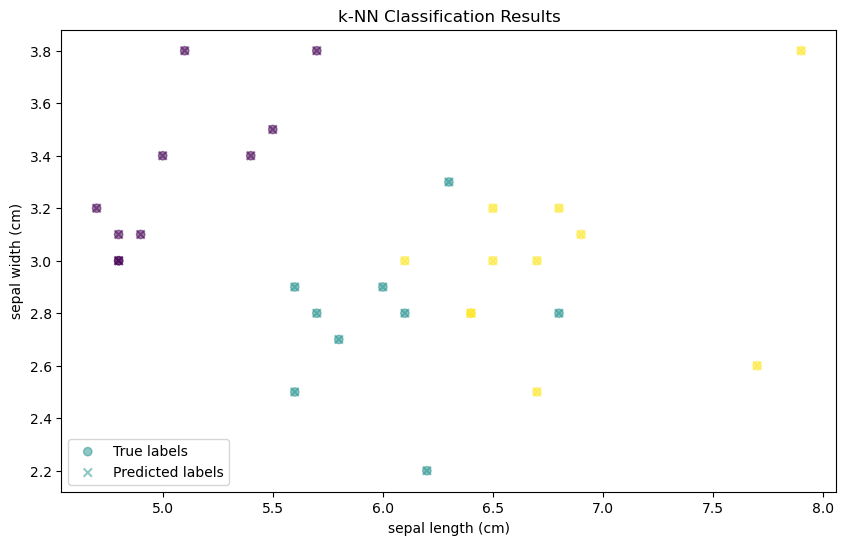

In [5]:
# Visualize the results (for 2D data)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True labels', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predicted labels', alpha=0.5)
plt.title('k-NN Classification Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

#### Implementation Using Several $k$ Values:

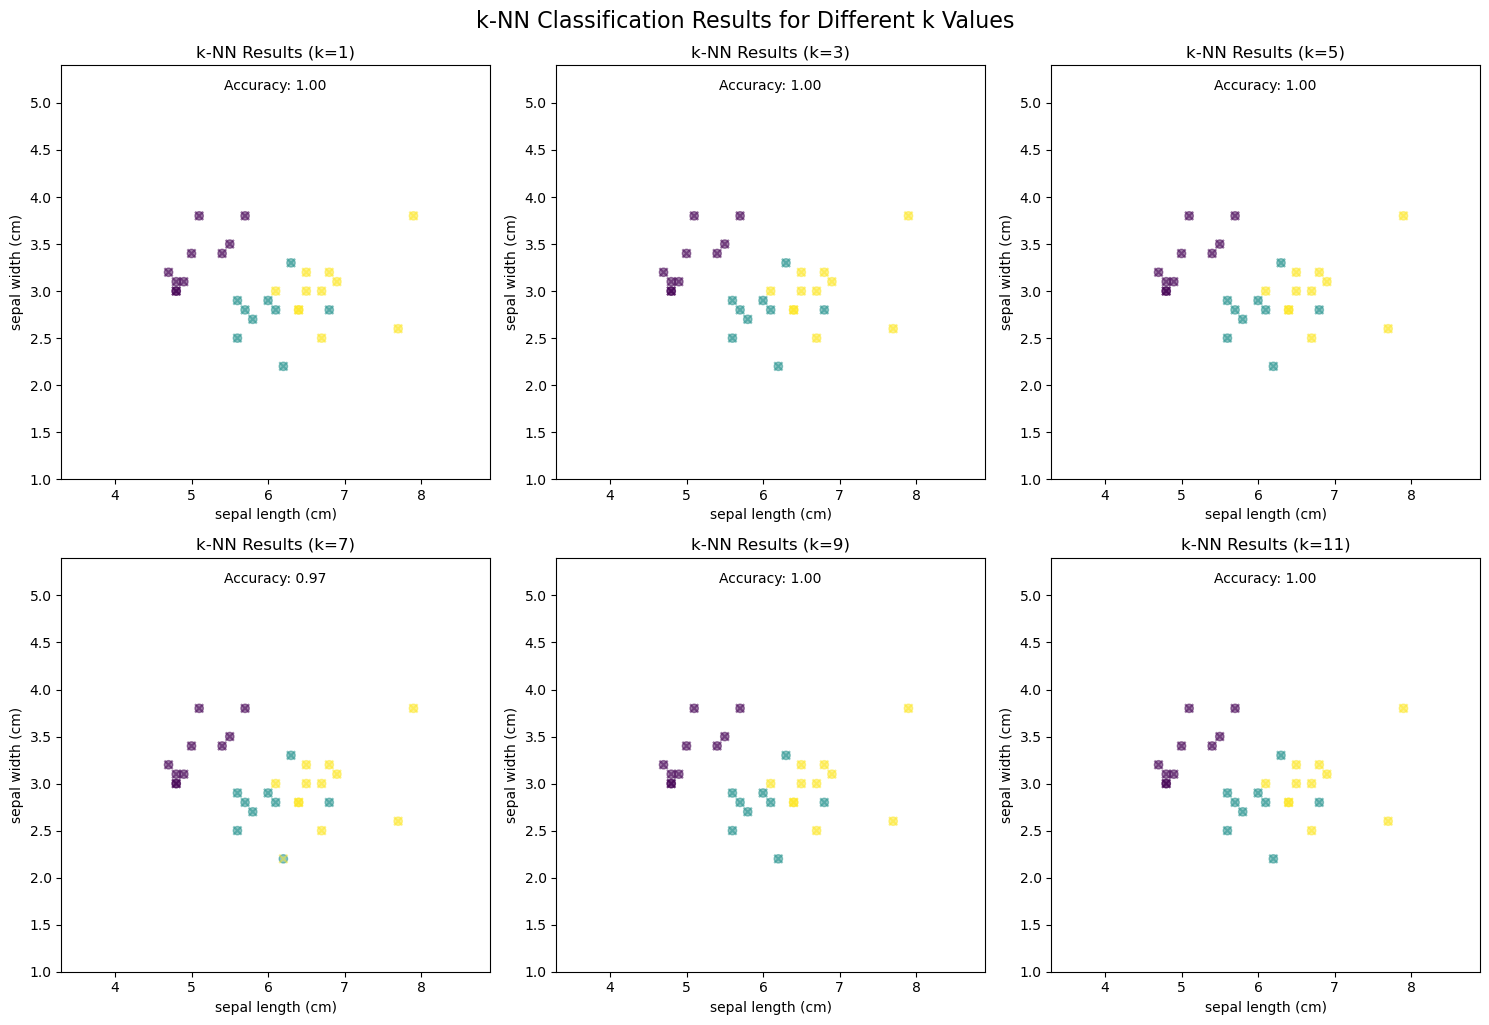

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9, 11]

# Prepare a figure for visualization
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Initialize the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model to the training data
    knn.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create a subplot for each k value
    plt.subplot(2, 3, i + 1)  # 2 rows and 4 columns
    
    # Visualize the results (for 2D data using the first two features)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True labels', alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predicted labels', alpha=0.5)
    plt.title(f'k-NN Results (k={k})')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    # Display accuracy on the plot
    plt.text(0.5, 0.95, f'Accuracy: {accuracy:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.suptitle('k-NN Classification Results for Different k Values', fontsize=16, y=1.02)
plt.show()


---

## Why is Nearest Neighbor a Lazy Algorithm?

K-Nearest Neighbors (k-NN) is called a “lazy” algorithm because it doesn’t build an explicit model during the training phase.

Instead, it stores all the training data and defers most of the computation until the prediction stage.

When a new input is given, k-NN calculates the distance between the new input and all stored data points to find the closest neighbors and make a prediction based on their labels.

This contrasts with “eager” algorithms, which perform heavy computation during training to construct a model, such as decision trees or neural networks. k-NN’s “laziness” refers to the fact that it delays this effort until the prediction step.

### *Example 2: How Lazy is k-NN?*

In [7]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

from time import time

In [8]:
covtype = fetch_covtype()

print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

In [9]:
X = covtype.data
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

First, we'll use `logistic_regression` (which is a classification model in fact!) to solve the problem.

**1. Let's create and fit the model (and calculate the time it takes to fit the model)**

In [10]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

tic = time()
logistic_regression.fit(X_train, y_train)
tac = time()

print(f'Logistic Regression Fitting Time: {tac - tic:.2f} seconds')

Logistic Regression Fitting Time: 104.88 seconds


/opt/homebrew/Caskroom/miniconda/base/envs/basic/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. Make the Predictions (and calculate the time elapsed)**

In [11]:
# Predictions
tic = time()
predictions = logistic_regression.predict(X_test)
tac = time()

# Accuracy
score = logistic_regression.score(X_test, y_test)

print(f'Logistic Regression Prediction Time: {tac - tic:.2f} seconds')
print(f'\nLogistic Regression Accuracy: {score:.2f}')

Logistic Regression Prediction Time: 0.01 seconds

Logistic Regression Accuracy: 0.68


#### K-Nearest Neighbours

We'll now use `KNeighborsClassifier` for classification in two steps:

**1. Let's create and fit the model (and calculate the time it takes to fit the model)**

In [12]:
# k-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
tic = time()
knn.fit(X_train, y_train)
tac = time()

print(f'k-NN Fitting Time: {tac - tic:.2f} seconds')

k-NN Fitting Time: 0.02 seconds


**2. Make the Predictions (and calculate the time elapsed)**

In [13]:
# Predictions
tic = time()
predictions = knn.predict(X_test)
tac = time()

# Accuracy
score = knn.score(X_test, y_test)

print(f'k-NN Prediction Time: {tac - tic:.2f} seconds')
print(f'\nk-NN Accuracy: {score:.2f}')

k-NN Prediction Time: 27.88 seconds

k-NN Accuracy: 0.97


Now you know that unlike eager learning algorithms that build a model during the training phase, k-NN simply stores the training data and does not perform any explicit learning until it's time for prediction.

This "lazy" approach means that k-NN waits until a new data point needs to be classified before it performs any calculations, relying on the proximity of stored data points to make predictions.

---

## Feature Scaling Methods in Scikit-learn

Scaling features is a crucial step in the preprocessing of data for machine learning algorithms.

Different scaling methods can influence model performance, especially for algorithms sensitive to the scale of input features.

Below are some commonly used scaling methods in Scikit-learn:

### 1. Standardization (Z-score Normalization)
Standardization transforms the features by centering them around the mean and scaling them to have unit variance. This is done using the formula:

$$ Z = \frac{(X - \mu)}{\sigma} $$

Where:
- $ X $ is the original feature value
- $ \mu $ is the mean of the feature
- $ \sigma $ is the standard deviation of the feature

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

> *Standardization is suitable for algorithms that assume data is centered around zero (e.g., PCA, Logistic Regression, k-NN).*

### 2. Min-Max Scaling (Normalization)
Min-max scaling transforms features by scaling them to a fixed range, usually \([0, 1]\). This is done using the formula:

$$
X_{\text{scaled}} = \frac{(X - X_{\text{min}})}{(X_{\text{max}} - X_{\text{min}})}
$$

Where:
- $X_{\text{min}}$ and $X_{\text{max}}$ are the minimum and maximum values of the feature, respectively.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

> *Min-max scaling is useful when the distribution of the data is not Gaussian, and when you want to maintain the relationships between values. Commonly used in neural networks.*

### 3. Robust Scaling
Robust scaling uses the median and the interquartile range (IQR) to scale the features, making it robust to outliers. The scaled values are calculated as:

$$
X_{\text{scaled}} = \frac{(X - \text{Median}(X))}{\text{IQR}(X)}
$$

where IQR is the difference between the 75th percentile and the 25th percentile.

In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

> *Robust scaling is effective when your data contains outliers as the scaling method is not influenced by extreme values.*

### 4. MaxAbs Scaling
MaxAbs scaling scales each feature by its maximum absolute value, resulting in values ranging from -1 to 1. It preserves the sparsity of the dataset.

$$
X_{\text{scaled}} = \frac{X}{|X_{\text{max}}|}
$$

In [17]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

> *MaxAbs scaling is suitable when you have sparse data and want to retain the sparsity after scaling.*

### 5. Power Transformation (Box-Cox and Yeo-Johnson)
Power transformations, such as Box-Cox and Yeo-Johnson, are used to make data more Gaussian-like. This helps in stabilizing variance and making the data more normally distributed.

Box-Cox can only be applied to strictly positive data, while Yeo-Johnson can be applied to any real-valued data.

In [18]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')  # Or method='box-cox' (for positive data)
X_scaled = scaler.fit_transform(X)

> *Power transformation is particularly beneficial for linear models which assume normally distributed errors.*


### Choice of Scaling Method

The choice of scaling method often depends on the characteristics of the data and the specific requirements of the machine learning algorithms you are using.
Remember: Always fit the scaler to the training data and then transform both the training and test data to prevent data leakage.

### *Example 3: Scaling the data before training the model*

In [19]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

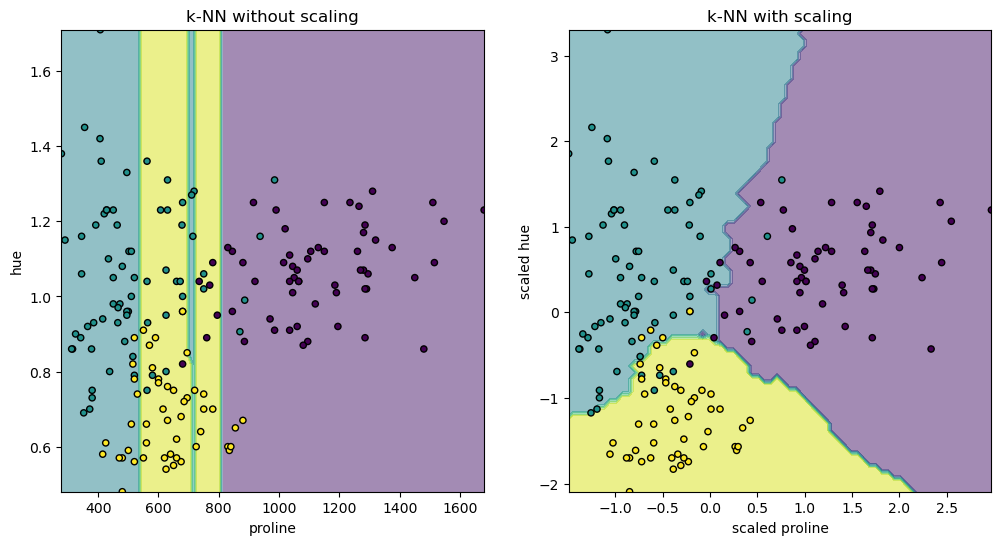

In [20]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Create a 2D dataset for visualization
X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)

# Initialize the k-NN classifier
clf = KNeighborsClassifier(n_neighbors=20)


# Helper function to fit the model and plot the decision boundaries
def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


# Plot the decision boundaries
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("k-NN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("k-NN with scaling")

---

### *Example 4: How Lazy is k-NN - The Scaled Data Strikes Back!*

In [21]:
scaler = StandardScaler()

X = scaler.fit_transform(covtype.data)
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [22]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

tic = time()
logistic_regression.fit(X_train, y_train)
tac = time()

print(f'Logistic Regression Fitting Time: {tac - tic:.2f} seconds')

# Predictions
tic = time()
predictions = logistic_regression.predict(X_test)
tac = time()

# Accuracy
score = logistic_regression.score(X_test, y_test)

print(f'Logistic Regression Prediction Time: {tac - tic:.2f} seconds')
print(f'\nLogistic Regression Accuracy: {score:.2f}')

Logistic Regression Fitting Time: 19.52 seconds
Logistic Regression Prediction Time: 0.01 seconds

Logistic Regression Accuracy: 0.72


#### K-Nearest Neighbours

In [23]:
# k-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
tic = time()
knn.fit(X_train, y_train)
tac = time()

print(f'k-NN Fitting Time: {tac - tic:.2f} seconds')

# Predictions
tic = time()
predictions = knn.predict(X_test)
tac = time()

# Accuracy
score = knn.score(X_test, y_test)

print(f'k-NN Prediction Time: {tac - tic:.2f} seconds')
print(f'\nk-NN Accuracy: {score:.2f}')

k-NN Fitting Time: 0.02 seconds
k-NN Prediction Time: 29.32 seconds

k-NN Accuracy: 0.93


---

# Cross-Validation

Cross-validation is a powerful technique used in machine learning to assess the generalization performance of a model.

For K-Nearest Neighbors (k-NN), cross-validation helps in selecting the optimal number of neighbors $(k)$ and ensuring that the model's performance is robust and not overly fitted to the training data.

**1. Remember Cross-Validation?**

Cross-validation involves partitioning a dataset into complementary subsets, training the model on one subset (training set) and validating it on the other (validation set). This process helps to mitigate the risk of overfitting and provides a more reliable estimate of model performance.

**Common Types of Cross-Validation:**

<div style="text-align:" center;>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4b/KfoldCV.gif" alt="KFold" width="1200" height="300"/>
</div>

- **K-Fold Cross-Validation**: The dataset is divided into $ k $ subsets (folds). The model is trained on $ k-1 $ folds and tested on the remaining fold. This is repeated $ k $ times, with each fold serving as the test set once.

- **Leave-One-Out Cross-Validation (LOOCV)**: A special case of K-Fold cross-validation where $ k $ is equal to the number of data points. Each sample is used once as the test set, while the remaining samples form the training set.

- **Stratified K-Fold Cross-Validation**: A variation of K-Fold that maintains the distribution of the target variable in each fold.

***2. Cross-Validation with k-NN***

When using cross-validation with k-NN, the process can help in:

***a. Selecting the Optimal $k$ Value***

k-NN's performance can vary significantly with different values of $ k $. Cross-validation allows us to evaluate various $ k $ values systematically.

***b. Estimating Model Performance***

Cross-validation provides a more accurate estimate of the model's performance, reducing the influence of any particular train-test split.


Scikit-learn provides several utilities to perform cross-validation easily. Below is an example of how to use K-Fold cross-validation with k-NN.

### *Example 5: Cross-Validation on Iris Dataset*

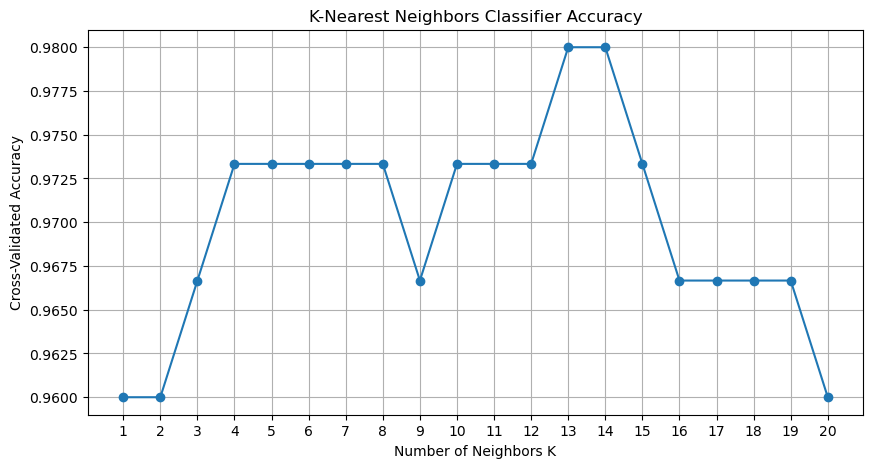

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)

# Prepare k-NN model
neighbors = range(1, 21)  # Testing values of k from 1 to 20
cv_scores = []  # To store the cross-validation scores

# Perform K-Fold cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')  # Accuracy scores
    cv_scores.append(scores.mean())  # Mean accuracy for each k

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(neighbors, cv_scores, marker='o', linestyle='-')
plt.title('K-Nearest Neighbors Classifier Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

### *Example VI: How Lazy is k-NN? - Return of the Cross-Validation!*

k=1, Accuracy: 0.94
k=3, Accuracy: 0.93
k=5, Accuracy: 0.93
k=7, Accuracy: 0.92
k=9, Accuracy: 0.92
k=17, Accuracy: 0.91


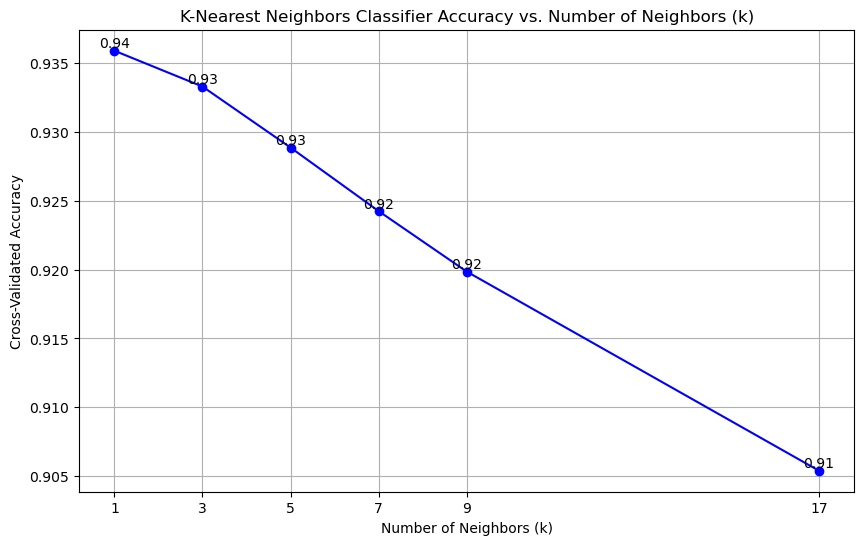

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
covtype = fetch_covtype()

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(covtype.data)
y = covtype.target

# K values to evaluate
k_values = [1, 3, 5, 7, 9, 17]
scores = []

# Loop through each k value and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds
    scores_k = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')  # Accuracy
    scores.append(scores_k.mean())  # Store mean accuracy for each k
    print(f'k={k}, Accuracy: {scores_k.mean():.2f}')

# Plotting the K values vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.title('K-Nearest Neighbors Classifier Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)  # Set x-ticks to be the k values
plt.grid()

# Display the accuracy for each k value on the plot
for i, score in enumerate(scores):
    plt.text(k_values[i], score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

## Create Your Own Model Using Your Own Dataset

Go to ```https://drawdata.xyz/#scatterchart``` by Vincent D. Warmerdam and create your own dataset to play with k-Nearest Neighbours models.